Zaimportowanie potrzebnych bibliotek


In [3636]:
import pygad
import copy
import time


Zapisanie labiryntu jako macierz (`0` - wolne miejsce, `1` - ściana) oraz ustalenie maksymalnej liczby ruchów na `30`


In [3637]:
labirynth = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1],
    [1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1],
    [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1],
    [1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1],
    [1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1],
    [1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1],
    [1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
]

max_moves = 30


Ustalenie przestrzeni genów na liczby `0` (góra), `1` (prawa), `2` (dół) oraz `3` (lewa)


In [3638]:
gene_space = [0, 1, 2, 3]


Stworzenie funkcji pomocniczych oraz funkcji fitness, która oblicza wynik rozwiązania na podstawie jego odległości od wyjścia z labiryntu, ilości kroków do tyłu oraz ilości kroków "w ścianę"


In [3639]:
def calculate_move(move, x, y, wrong):
    match move:
        case 0:
            if labirynth[x][y + 1]:
                wrong += 1
            else:
                y += 1
        case 1:
            if labirynth[x + 1][y]:
                wrong += 1
            else:
                x += 1
        case 2:
            if labirynth[x][y - 1]:
                wrong += 1
            else:
                y -= 1
        case _:
            if labirynth[x - 1][y]:
                wrong += 1
            else:
                x -= 1
    return x, y, wrong


def distance_from_exit(x, y):
    return abs(x - 10) + abs(y - 10)


def fitness_function(solution, solution_idx):
    position_x, position_y, wrong_moves, moves_back = 1, 1, 0, 0

    for move in solution:
        distance_before = distance_from_exit(position_x, position_y)

        position_x, position_y, wrong_moves = calculate_move(
            move, position_x, position_y, wrong_moves)

        distance_after = distance_from_exit(position_x, position_y)

        if distance_after > distance_before:
            moves_back += 1

    distance_final = distance_from_exit(position_x, position_y)

    return 1000/(4 * distance_final + 3 * moves_back + wrong_moves)


Ustalenie wielkości populacji na `300` chromosomów oraz ilości genów na ilość ruchów (`30`)


In [3640]:
sol_per_pop = 300
num_genes = max_moves


Ustalenie liczby rodziców do "rozmnażania" na `150`, liczby generacji na `150` oraz ilości rodziców do zachowania między generacjami na `40`


In [3641]:
num_parents_mating = 150
num_generations = 150
keep_parents = 40


Ustalenie typu selekcji rodziców oraz ilości punktów, w których należy robić krzyżowanie


In [3642]:
parent_selection_type = "sss"
crossover_type = "single_point"


Ustalenie typu mutacji na losową oraz procentu mutowanych genów na `4%`


In [3643]:
mutation_type = "random"
mutation_percent_genes = 4


Ustalenie warunku zatrzymania na osiągnięcie wyniku chromosomu większego lub równego `75`


In [3644]:
stop_criteria = "reach_75"


Inicjalizacja oraz uruchomienie algorytmu ze zdefiniowanymi parametrami oraz zmierzenie czasu jego działania


In [3645]:
start = time.time()

ga_instance = pygad.GA(
    gene_space=gene_space,
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_function,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    parent_selection_type=parent_selection_type,
    keep_parents=keep_parents,
    crossover_type=crossover_type,
    mutation_type=mutation_type,
    mutation_percent_genes=mutation_percent_genes,
    stop_criteria=stop_criteria
)

ga_instance.run()

end = time.time()

duration = end - start


Wyświetlenie czasu wykonania algorytmu, najlepszego znalezionego chromosomu oraz jego wyniku


In [3646]:
solution, solution_fitness, _ = ga_instance.best_solution()
print("Duration of algorythm: {} seconds".format(duration))
print("Parameters of the best solution: {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(
    solution_fitness=solution_fitness))


Duration of algorythm: 0.46007728576660156 seconds
Parameters of the best solution: [1. 3. 0. 0. 3. 0. 1. 0. 0. 3. 3. 0. 0. 3. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1.
 0. 1. 1. 0. 1. 1.]
Fitness value of the best solution = 76.92307692307692


Wyświetlenie znalezionej drogi w formie macierzy, gdzie `X` wyznaczają ścieżkę do wyjścia


In [3647]:
answer = copy.deepcopy(labirynth)
x, y, wrong = 1, 1, 0
for move in solution:
    x, y, _ = calculate_move(move, x, y, wrong)
    answer[x][y] = "X"

for line in answer:
    for tile in line:
        print(tile, end=" ")
    print()


1 1 1 1 1 1 1 1 1 1 1 1 
1 X X X 1 X X X 1 0 0 1 
1 1 1 X X X 1 X 1 1 0 1 
1 0 0 0 1 0 1 X 0 0 0 1 
1 0 1 0 1 1 0 X 1 1 0 1 
1 0 0 1 1 0 0 X 1 0 0 1 
1 0 0 0 0 0 1 X X X 1 1 
1 0 1 0 0 1 1 0 1 X X 1 
1 0 1 1 1 0 0 0 1 1 X 1 
1 0 1 0 1 1 0 1 0 1 X 1 
1 0 1 0 0 0 0 0 0 0 X 1 
1 1 1 1 1 1 1 1 1 1 1 1 


Wykres przedstawiający zmianę oceny na przestrzeni pokoleń


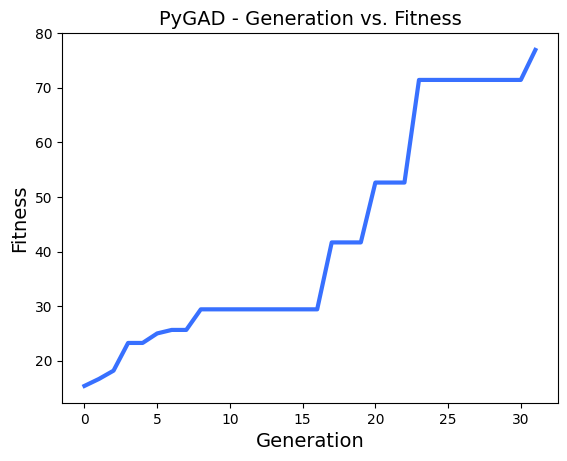

In [3648]:
ga_instance.plot_fitness()
print()
